Студент Жилкин Федор, 344
# Домашняя работа 7: "Задача Коши"


<img src="task.jpg">

In [287]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [288]:
def F(x, y):
    return 1 + (1.5 - x)*np.sin(y) - (2 + x)*y

In [289]:
y0 = 0
h = 0.05
x = np.arange(0,0.55, h)

## Получить таблицу значений решения задачи с шагом h = 0.05 на [0, 0.5]

In [290]:
y = odeint(F, y0, x).T.flatten()
d = {'$x$': x, '$y$': y}
df = pd.DataFrame(data=d)
df.style.hide_index()

$x$,$y$
0,0
0.05,0.0492921
0.1,0.0968425
0.15,0.142179
0.2,0.18486
0.25,0.224483
0.3,0.260695
0.35,0.293196
0.4,0.321744
0.45,0.34616


## Методом Эйлера улучшенным получить таблицу решения на [0, 0.5]

In [291]:
def euler(h, x):    
    y = x*0
    for i in range(1, len(x)):
        y[i] = y[i-1] + h * F(y[i-1] + h/2 * F(y[i-1], x[i-1]), x[i-1] + h/2)
    return y 

### С шагом $h - y^h$

In [292]:
x = np.arange(0, 0.55, h)
y1 = euler(h, x)
d = {'x': x, '$y_h$': y1}
df_2 = pd.DataFrame(data=d)
df = pd.DataFrame(data=d)
df.style.hide_index()

x,$y_h$
0,0
0.05,0.0493123
0.1,0.0968806
0.15,0.142231
0.2,0.184922
0.25,0.22455
0.3,0.260761
0.35,0.293254
0.4,0.32179
0.45,0.346187


### С шагом $h/2 - y^{h/2}$

In [293]:
x = np.arange(0, 0.55, h/2)
y2 = euler(h/2, x)
d = {'$x$': x, '$y_{h/2}$': y2}
df = pd.DataFrame(data=d)
df.head(21).style.hide_index()

$x$,$y_{h/2}$
0,0
0.025,0.0248359
0.05,0.0492972
0.075,0.0733225
0.1,0.096852
0.125,0.119827
0.15,0.142192
0.175,0.163892
0.2,0.184875
0.225,0.205093


### Уточнить решение по Ричардсону

In [294]:
def richardson(y1, y2, s):
    y_rev = x*0
    for i in range(len(y_h)):
        r_m = (y2[2*i] - y_h[i]) / (pow(2, s) - 1)
        y_rev[i] = (y2[2*i] + r_m)
    return y_rev

In [295]:
s = 2
x = np.arange(0, 0.55, h)
y_rev = richardson(y1, y2, s)
d = {'$x$': x, '$y_{rev}$': y_rev}
df = pd.DataFrame(data=d)
df.style.hide_index()

$x$,$y_{rev}$
0,0
0.05,0.0492921
0.1,0.0968425
0.15,0.142179
0.2,0.18486
0.25,0.224483
0.3,0.260695
0.35,0.293195
0.4,0.321744
0.45,0.34616


## Напечатать таблицу значений

In [296]:
y2_new = x*0
for i in range(len(y2_new)):
    y2_new[i] = y2[2*i]
d = {'$x$': x, '$y$': y, '$y_h$': y1, '$y_{h/2}$': y2_new,
     '$y_{rev}$': y_rev, '$y_{rev} - y$': y_rev - y}
df = pd.DataFrame(data=d)
df.style.hide_index()

$x$,$y$,$y_h$,$y_{h/2}$,$y_{rev}$,$y_{rev} - y$
0,0,0,0,0,0
0.05,0.0492921,0.0493123,0.0492972,0.0492921,-1.20614e-08
0.1,0.0968425,0.0968806,0.096852,0.0968425,-5.93559e-08
0.15,0.142179,0.142231,0.142192,0.142179,-1.1647e-07
0.2,0.18486,0.184922,0.184875,0.18486,-1.84148e-07
0.25,0.224483,0.22455,0.2245,0.224483,-2.48184e-07
0.3,0.260695,0.260761,0.260711,0.260695,-3.00904e-07
0.35,0.293196,0.293254,0.29321,0.293195,-3.45199e-07
0.4,0.321744,0.32179,0.321755,0.321744,-3.53846e-07
0.45,0.34616,0.346187,0.346166,0.34616,-3.20785e-07


## Построить графики заданных таблично функций в одних осях координат

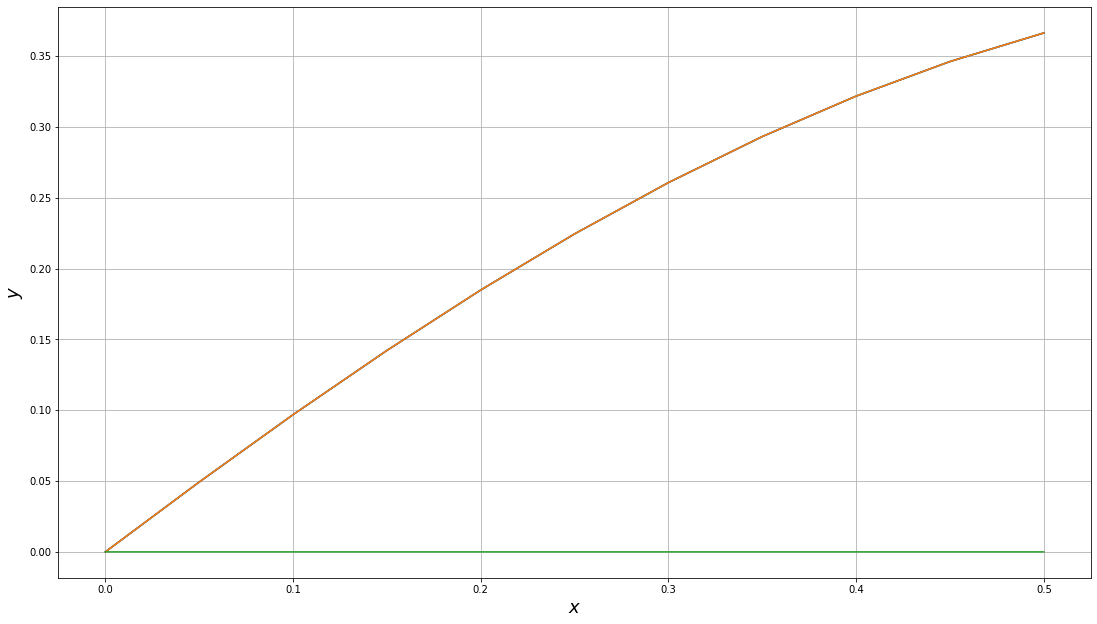

In [297]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
a = fig.add_subplot(1, 1, 1)
a.grid(True)
plt.plot(x, y, 'black')
plt.plot(x, y_rev)
plt.plot(x, y2_new)
plt.plot(x, y_rev - y)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$y$', fontsize=18)
plt.show()

## Вычислить решение методом Рунге-Кутты

In [298]:
def runge_kutt(x, h):
    y_rk = x*0
    for i in range(0, len(x) - 1):
        k1 = h * F(y_rk[i], x[i])
        k2 = h * F(y_rk[i] + k1/2, x[i] + h/2)
        k3 = h * F(y_rk[i] + k2/2, x[i] + h/2)
        k4 = h * F(y_rk[i] + k3, x[i] + h)
        y_rk[i+1] = y_rk[i] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    return y_rk

In [299]:
x = np.arange(0, 0.55, h)
y_rk = runge_kutt(x, h)
d = {'$x$': x, '$y_{R-K}$': y_rk}
df = pd.DataFrame(data=d)
df.style.hide_index()

$x$,$y_{R-K}$
0,0
0.05,0.0492921
0.1,0.0968425
0.15,0.142179
0.2,0.18486
0.25,0.224483
0.3,0.260695
0.35,0.293196
0.4,0.321744
0.45,0.34616


## Вычислить решение экстраполяционным методом Адамса 3-его порядка с шагом из метода Рунге-Кутты

In [300]:
def calculate_q(y, x, h):
    q = np.arange(0, 0.55, h)
    for i in range(len(x)):
        q[i] = h * F(y[i], x[i])
    return q

In [301]:
def Adams_exp(x, y_Adams_exp, h, q):
    for i in range(0, len(x) - 1):
        y_Adams_exp[i+1] = (y_Adams_exp[i] + 1.0/720 * (1901 * q[i + 4] - 2774 *
                                                q[i + 3] + 2616 * q[i + 2] - 1274 * q[i + 1] + 251 * q[i]))
        q[i + 5] = h * F(y_Adams_exp[i + 1], x[i + 1])
    return y_Adams_exp

In [302]:
x_Adams_exp = np.arange(4*h,0.55, h)
y_Adams_exp = x_Adams_exp*0

x_help = np.arange(0,0.25, h)
y_help = runge_kutt(x_help, h)

q = calculate_q(y_help, x_help, h)

y_Adams_exp[0] = y_help[4]
y_Adams_exp = Adams_exp(x_Adams_exp, y_Adams_exp, h, q)

d = {'$x$': x_Adams_exp, '$y^{exp}_{Adams}$': y_Adams_exp}
df = pd.DataFrame(data=d)
df.style.hide_index()

$x$,$y^{exp}_{Adams}$
0.2,0.18486
0.25,0.224483
0.3,0.260696
0.35,0.293197
0.4,0.321746
0.45,0.346162
0.5,0.366329


## Вычислить решение интерполяционным методом Адамса 4-ого порядка

In [303]:
def Adams_int(y_Adams_int, h, q):
    for i in range(0, len(y_Adams_int) - 1):
        y_Adams_int[i+1] = y_Adams_int[i] + 1.0/720 * \
            (251 * q[i + 4] + 646 * q[i + 3] - 264 *
             q[i + 2] + 106 * q[i + 1] - 19 * q[i])
    return y_Adams_int

In [304]:
x_Adams_int = np.arange(4*h, 0.55, h)
y_Adams_int = x_Adams_int*0

x_help = np.arange(0, 0.55, h)
y_help = runge_kutt(x_help, h)

q = calculate_q(y_help, x_help, h)

y_Adams_int[0] = y_help[4]
y_Adams_int = Adams_int(y_Adams_int, h, q)

d = {'$x$': x_Adams_int, '$y^{int}_{Adams}$': y_Adams_int}
df = pd.DataFrame(data=d)
df.style.hide_index()

$x$,$y^{int}_{Adams}$
0.2,0.18486
0.25,0.22754
0.3,0.267164
0.35,0.303376
0.4,0.335876
0.45,0.364425
0.5,0.388841


## Напечатать таблицу значений решения и погрешностей


In [305]:
y_ = y[4:]
y_rk_ = y_rk[4:]
x = np.arange(0, 0.55, h)[4:]

d = {'$x$': x, '$|$$y - y_{R-K}|$': abs(y_ - y_rk_), '$|$$y - y^{exp}_{Adams}$$|$': abs(y_ -
     y_Adams_exp), '$|$$y - y^{int}_{Adams}$$|$': abs(y_ - y_Adams_int)}

df = pd.DataFrame(data=d)
df.style.hide_index()

$x$,$|$$y - y_{R-K}|$,$|$$y - y^{exp}_{Adams}$$|$,$|$$y - y^{int}_{Adams}$$|$
0.2,3.64317e-09,3.64317e-09,3.64317e-09
0.25,4.81081e-09,4.02578e-07,0.00305739
0.3,5.0156e-09,8.68253e-07,0.00646877
0.35,9.22158e-09,1.38697e-06,0.01018
0.4,2.03727e-08,1.91954e-06,0.0141325
0.45,3.04199e-08,2.4451e-06,0.0182647
0.5,4.16227e-08,2.92586e-06,0.0225145
